<a href="https://colab.research.google.com/github/Carlos1729/Transformers_Code/blob/main/WhyFineTune_TuneVsUntuned.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title Step 1: Authenticate with Google
# @markdown Note: You will be asked to sign in with Google, connected to your Lamini account.

from google.colab import auth
import requests
import os
import yaml

def authenticate_powerml():
  auth.authenticate_user()
  gcloud_token = !gcloud auth print-access-token
  powerml_token_response = requests.get('https://api.powerml.co/v1/auth/verify_gcloud_token?token=' + gcloud_token[0])
  print(powerml_token_response)
  return powerml_token_response.json()['token']

key = authenticate_powerml()

config = {
    "production": {
        "key": key,
        "url": "https://api.powerml.co"
    }
}

keys_dir_path = '/root/.powerml'
os.makedirs(keys_dir_path, exist_ok=True)

keys_file_path = keys_dir_path + '/configure_llama.yaml'
with open(keys_file_path, 'w') as f:
  yaml.dump(config, f, default_flow_style=False)


<Response [200]>


In [2]:
# @title Step 2: Install the open-source [Lamini library](https://pypi.org/project/lamini/) to use LLMs easily
# @markdown Note: After installing, click the "RESTART RUNTIME" button at the end of the output, then go onto the next cell.
# @markdown Lamini is just on a more recent version of numpy than Colab.
!pip install --upgrade --force-reinstall --ignore-installed lamini

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 57.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 83.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 66.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 85.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 54.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 99.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.2/394.2 kB 44.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.4/192.4 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━

 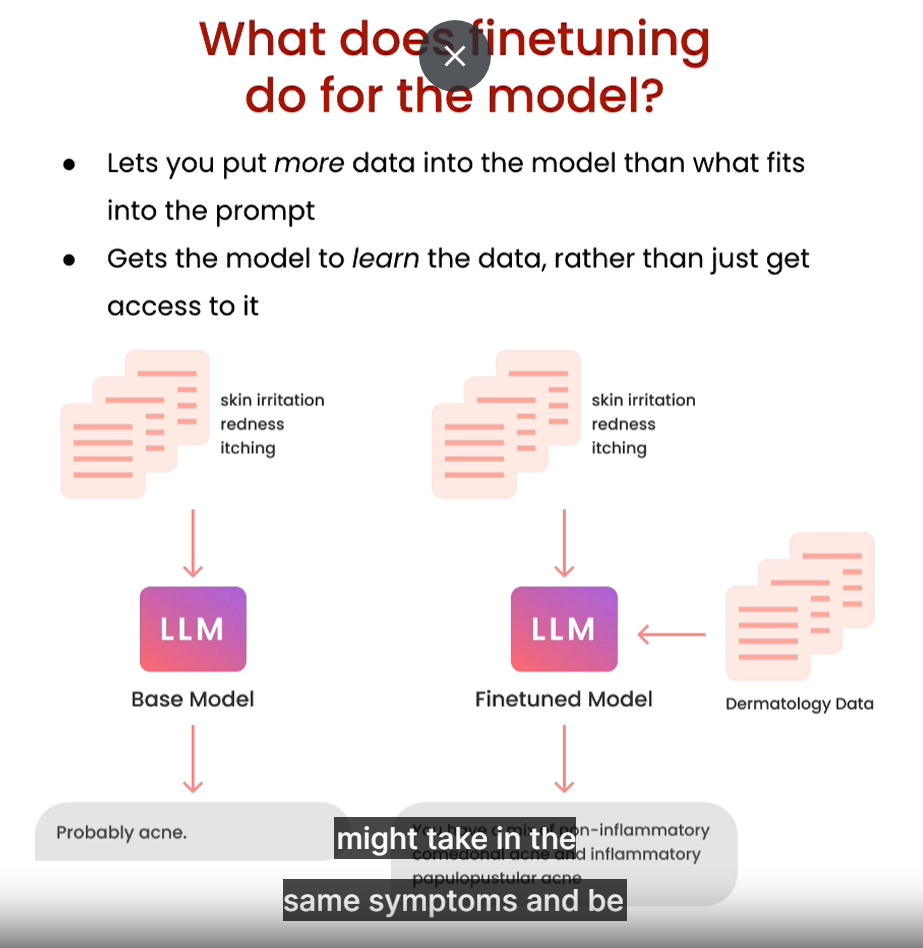

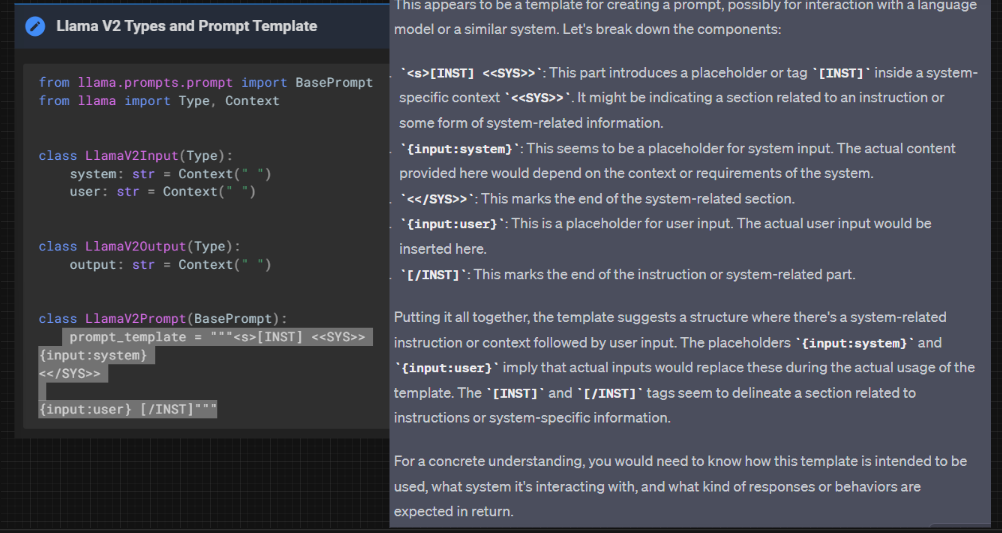

In [2]:
# LlamaV2Runner uses the following prompt template, input, and output types internally. You won't need to re-instantiate these, this class will do the instantiation for you.

In [3]:
from llama import LlamaV2Runner
model = LlamaV2Runner()

In [4]:
from llama import BasicModelRunner

In [6]:
# The BasicModelRunner class is designed for running and training a basic model without any prompt templates or frills.
# It provides methods to interact with the model and manage data loading and training.

In [7]:
non_finetuned = BasicModelRunner("meta-llama/Llama-2-7b-hf")

In [8]:
non_finetuned_output = non_finetuned("Tell me how to train my dog to sit")

In [9]:
print(non_finetuned_output)

.
Tell me how to train my dog to sit. I have a 10 month old puppy and I want to train him to sit. I have tried the treat method and he just sits there and looks at me like I am crazy. I have tried the "sit" command and he just looks at me like I am crazy. I have tried the "sit" command and he just looks at me like I am crazy. I have tried the "sit" command and he just looks at me like I am crazy. I have tried the "sit" command and he just looks at me like I am crazy. I have tried the "sit" command and he just looks at me like I am crazy. I have tried the "sit" command and he just looks at me like I am crazy. I have tried the "sit" command and he just looks at me like I am crazy. I have tried the "sit" command and he just looks at me like I am crazy. I have tried the "sit" command and he just looks at me like I am crazy. I have tried the "sit" command and he just looks


In [10]:
print(non_finetuned("What do you think of Mars?"))


I think it's a great planet.
I think it's a great planet. I think it's a great planet. I think it's a great planet. I think it's a great planet. I think it's a great planet. I think it's a great planet. I think it's a great planet. I think it's a great planet. I think it's a great planet. I think it's a great planet. I think it's a great planet. I think it's a great planet. I think it's a great planet. I think it's a great planet. I think it's a great planet. I think it's a great planet. I think it's a great planet. I think it's a great planet. I think it's a great planet. I think it's a great planet. I think it's a great planet. I think it's a great planet. I think it's a great planet. I think it's a great planet. I think it's a great planet. I think it's a great planet. I think it's a great planet. I think


In [11]:
print(non_finetuned("taylor swift's best friend"))


I'm not sure if I've ever mentioned this before, but I'm a huge Taylor Swift fan. I've been a fan since her first album, and I've been a fan ever since. I've been a fan of her music, her lyrics, her style, her personality, and her personality. I've been a fan of her music, her lyrics, her style, her personality, and her personality. I've been a fan of her music, her lyrics, her style, her personality, and her personality. I've been a fan of her music, her lyrics, her style, her personality, and her personality. I've been a fan of her music, her lyrics, her style, her personality, and her personality. I've been a fan of her music, her lyrics, her style, her personality, and her personality. I've been a fan of her music, her lyrics, her style, her personality, and her personality. I've been a fan of her music, her lyrics, her style, her personality, and her personality. I'


In [12]:
print(non_finetuned("""Agent: I'm here to help you with your Amazon deliver order.
Customer: I didn't get my item
Agent: I'm sorry to hear that. Which item was it?
Customer: the blanket
Agent:"""))

 I'm sorry to hear that. I'll look into it.
Customer: I'm not sure if I got the right blanket.
Agent: I'm sorry to hear that. I'll look into it.
Customer: I'm not sure if I got the right blanket. I'm not sure if I got the right blanket.
Agent: I'm sorry to hear that. I'll look into it. I'll look into it.
Customer: I'm not sure if I got the right blanket. I'm not sure if I got the right blanket. I'm not sure if I got the right blanket.
Agent: I'm sorry to hear that. I'll look into it. I'll look into it. I'll look into it.
Customer: I'm not sure if I got the right blanket. I'm not sure if I got the right blanket. I'm not sure if I got the right blanket. I'm not sure if I got the right blanket. I'm not sure if I got the right blanket. I'm not sure if I got the right blank


In [13]:
finetuned_model = BasicModelRunner("meta-llama/Llama-2-7b-chat-hf")

In [14]:
finetuned_output = finetuned_model("Tell me how to train my dog to sit")

In [15]:
print(finetuned_output)

 on command.
Training a dog to sit on command is a basic obedience command that can be achieved with patience, consistency, and positive reinforcement. Here's a step-by-step guide on how to train your dog to sit on command:

1. Choose a quiet and distraction-free area: Find a quiet area with minimal distractions where your dog can focus on you.
2. Have treats ready: Choose your dog's favorite treats and have them ready to use as rewards.
3. Stand in front of your dog: Stand in front of your dog and hold a treat close to their nose.
4. Move the treat up and back: Slowly move the treat up and back, towards your dog's tail, while saying "sit" in a calm and clear voice.
5. Dog will sit: As you move the treat, your dog will naturally sit down to follow the treat. The moment their bottom touches the ground, say "good sit" and give them the treat.
6. Repeat the process: Repeat steps 3-5 several times, so your dog starts to associate the command "sit" with


In [ ]:
# And the way to actually, quote unquote,
# get rid of this extra auto-complete thing is actually to
# inform the model that you want instructions.
# So I'm actually putting these instruction tags here.
# This was used for LLAMA2.

In [16]:
print(finetuned_model("[INST]Tell me how to train my dog to sit[/INST]"))

  Training your dog to sit is a basic obedience command that can be achieved with patience, consistency, and positive reinforcement. Here's a step-by-step guide on how to train your dog to sit:

1. Choose a quiet and distraction-free area: Find a quiet area with no distractions where your dog can focus on you.
2. Have treats ready: Choose your dog's favorite treats and have them ready to use as rewards.
3. Stand in front of your dog: Stand in front of your dog and hold a treat close to their nose.
4. Move the treat up and back: Slowly move the treat up and back, towards your dog's tail, while saying "sit" in a calm and clear voice.
5. Dog will sit: As you move the treat, your dog will naturally sit down to follow the treat. The moment their bottom touches the ground, say "good sit" and give them the treat.
6. Repeat the process: Repeat steps 3-5 several times, so your dog starts to associate the command "sit" with the action of sitting down.
7


In [17]:
print(non_finetuned("[INST]Tell me how to train my dog to sit[/INST]"))


[INST]Tell me how to train my dog to sit[/INST]
[INST]Tell me how to train my dog to sit[/INST] [INST]Tell me how to train my dog to sit[/INST] [INST]Tell me how to train my dog to sit[/INST] [INST]Tell me how to train my dog to sit[/INST] [INST]Tell me how to train my dog to sit[/INST] [INST]Tell me how to train my dog to sit[/INST] [INST]Tell me how to train my dog to sit[/INST] [INST]Tell me how to train my dog to sit[/INST] [INST]Tell me how to train my dog to sit[/INST] [INST]Tell me how to train my dog to sit[/INST] [INST]Tell me how to train my dog to sit[/INST] [INST]Tell me how to train my dog to sit[/INST] [INST]Tell me how to train my dog to sit[/INST] [INST]Tell me how to train my dog to sit[/INST


In [18]:
print(finetuned_model("What do you think of Mars?"))



Mars is a fascinating planet that has captured the imagination of humans for centuries. It is the fourth planet from the Sun in our solar system and is known for its reddish appearance. Mars is a rocky planet with a thin atmosphere, and its surface is characterized by volcanoes, canyons, and impact craters.

One of the most intriguing aspects of Mars is its potential to support life. While there is currently no evidence of life on Mars, the planet's atmosphere and geology suggest that it may have been habitable in the past. NASA's Curiosity rover has been exploring Mars since 2012, and it has discovered evidence of water on the planet, which is a key ingredient for life.

Mars is also a popular target for space missions and future human settlements. Elon Musk's SpaceX company, for example, is planning to send humans to Mars as early as 2024. The potential for Mars to become a human settlement is exciting, but it also raises many challenges and questions, such as how to protect the pl

In [19]:
print(finetuned_model("taylor swift's best friend"))



Taylor Swift's best friend is a person who has been by her side through thick and thin. Here are some possible candidates:

1. Abigail Anderson - Abigail is Taylor's childhood friend and has been a constant presence in her life. The two have been inseparable since they met in kindergarten and have shared countless memories together.
2. Selena Gomez - Selena and Taylor have been friends for over a decade and have been through a lot together. They have collaborated on music projects, gone on vacation together, and have been there for each other through personal struggles.
3. Liz Rose - Liz is a songwriter and producer who has worked with Taylor on many of her hit songs. The two have a close professional relationship and have also become close friends over the years.
4. Joe Jonas - Joe and Taylor were in a relationship for a few years in the early 2000s and have remained close friends since then. They have been spotted together at various events and have even collaborated on music proje

In [20]:
print(finetuned_model("""Agent: I'm here to help you with your Amazon deliver order.
Customer: I didn't get my item
Agent: I'm sorry to hear that. Which item was it?
Customer: the blanket
Agent:"""))

 I see. Can you please provide me with your order number so I can look into this for you?
Customer: I don't have the order number.
Agent: Okay, no worries. Can you please tell me the name of the item you didn't receive?
Customer: It was a blue blanket.
Agent: I see. I'm going to check on the status of your order for you. Can you please hold for just a moment?
Customer: Okay, thank you.
Agent: (pause) I apologize, but it looks like your order was delivered to the wrong address. Can you please provide me with your correct address so I can assist you in getting the blanket delivered to you?
Customer: (sighs) I don't know why this is happening to me. I've been ordering from Amazon for years and never had any problems.
Agent: I apologize for any inconvenience this has caused. I'm here to help you resolve the issue as quickly as possible. Can you please provide me with your correct address so I can assist you?
Customer: (frustrated) Fine. It's 123 Main St, Apartment 


In [21]:
### Compare to ChatGPT

In [22]:
chatgpt = BasicModelRunner("chat-gpt")

In [23]:
print(chatgpt("Tell me how to train my dog to sit"))

status code: 400


UserError: ignored